In [29]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import rcParams
# rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import scipy

from datetime import datetime

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [3]:
df = pd.read_csv("../DABA/네이버_야놀자_병합1.csv", encoding='euc-kr')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   사업장명                    1042 non-null   object 
 1   업소유형                    395 non-null    object 
 2   업태구분명                   1042 non-null   object 
 3   지번주소                    1034 non-null   object 
 4   도로명주소                   1042 non-null   object 
 5   가까운 지하철역                1042 non-null   object 
 6   지하철역과의 거리               1042 non-null   float64
 7   도보시간                    1042 non-null   float64
 8   위도                      1042 non-null   float64
 9   경도                      1042 non-null   float64
 10  별점                      218 non-null    float64
 11  방문자 리뷰수                 374 non-null    float64
 12  블로그 리뷰수                 320 non-null    float64
 13  한실수                     731 non-null    float64
 14  양실수                     754 non-null    

In [5]:
df.head(3)

,사업장명,업소유형,업태구분명,지번주소,도로명주소,가까운 지하철역,지하철역과의 거리,도보시간,위도,경도,...,교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내),yanolja_pk
0,오요5(oYo5),호스텔,관광호텔,서울특별시 중구 남산동2가 35-2,"서울특별시 중구 퇴계로18길 43, 지층, 1~2층 (남산동2가)","명동, 4호선",263.21576,3.946264,37.558933,126.98484,...,98463.33,97987.79,196451.12,13,11,0.25,0.68,0.23,0.51,"37.5589341416, 126.9848376850"
1,더스테이클래식호텔,호텔,숙박업(생활),서울특별시 중구 남대문로3가 94,서울특별시 중구 남대문로 27 (남대문로3가),"회현(남대문시장), 4호선",330.15198,4.949805,37.561480,126.97852,...,74675.65,75509.80,150185.45,13,14,0.18,0.66,0.23,0.46,"37.5614803705, 126.9785247556"
2,베스테이린,"기업,빌딩",일반호텔,서울특별시 관악구 봉천동 866-4,서울특별시 관악구 남부순환로220길 34 (봉천동),"서울대입구(관악구청), 2호선",201.82631,3.025882,37.479755,126.95143,...,49200.56,48453.84,97654.41,9,4,0.15,0.69,0.15,0.52,"37.4797547070, 126.9514350112"


In [6]:
# 필요컬럼 추출
select_column = ['사업장명', '지번주소', '도로명주소', '가까운 지하철역', "지하철역과의 거리",
                '도보시간', '위도', '경도', '별점', '구비시설', '네이버 이런점이 좋아요 총합', '네이버 이런점이 좋아요 {항목:좋아요수}',
                '리뷰수', '객실수', '구비시설 개수', '운영기간', '종류', '평점', '숙박가격', '인기테그', '별점 높은순 후기', '별점 낮은순 후기',
                '총후기', '경쟁업소_수(1km내)', '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)',  '경쟁업소_평균거리(1km내)',
                '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)', '지하철역_최단거리(1km내)',
                '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)', '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)',
                '관광지_수(1km내)', '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)', '쇼핑몰_평균거리(1km내)']
sel_df = df[select_column]

In [7]:
sel_df.head(3)

,사업장명,지번주소,도로명주소,가까운 지하철역,지하철역과의 거리,도보시간,위도,경도,별점,구비시설,...,지하철역_평균거리(1km내),교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내)
0,오요5(oYo5),서울특별시 중구 남산동2가 35-2,"서울특별시 중구 퇴계로18길 43, 지층, 1~2층 (남산동2가)","명동, 4호선",263.21576,3.946264,37.558933,126.98484,NaN,NaN,...,0.80,98463.33,97987.79,196451.12,13,11,0.25,0.68,0.23,0.51
1,더스테이클래식호텔,서울특별시 중구 남대문로3가 94,서울특별시 중구 남대문로 27 (남대문로3가),"회현(남대문시장), 4호선",330.15198,4.949805,37.561480,126.97852,NaN,"['와이파이', '주차장', '컨시어지', '물품보관소']",...,0.50,74675.65,75509.80,150185.45,13,14,0.18,0.66,0.23,0.46
2,베스테이린,서울특별시 관악구 봉천동 866-4,서울특별시 관악구 남부순환로220길 34 (봉천동),"서울대입구(관악구청), 2호선",201.82631,3.025882,37.479755,126.95143,NaN,NaN,...,0.55,49200.56,48453.84,97654.41,9,4,0.15,0.69,0.15,0.52


In [8]:
# .. 연속변수 선택
select_continuos = ['별점', '평점', "지하철역과의 거리", '도보시간', '위도', '경도', '네이버 이런점이 좋아요 총합', '리뷰수', '객실수', '구비시설 개수', '운영기간',
 '숙박가격', '총후기', '경쟁업소_수(1km내)', '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)',  '경쟁업소_평균거리(1km내)',
'버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)', '지하철역_최단거리(1km내)',
'지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)', '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)',
'관광지_수(1km내)', '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)', '쇼핑몰_평균거리(1km내)']
#select_continuos = ['별점','지하철역과의 거리','도보시간','리뷰수','객실수','구비시설 개수','네이버 이런점이 좋아요 총합','운영기간'] # 8개
continuous_var = sel_df[select_continuos]
continuous_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   별점                     218 non-null    float64
 1   평점                     1042 non-null   float64
 2   지하철역과의 거리              1042 non-null   float64
 3   도보시간                   1042 non-null   float64
 4   위도                     1042 non-null   float64
 5   경도                     1042 non-null   float64
 6   네이버 이런점이 좋아요 총합        150 non-null    float64
 7   리뷰수                    314 non-null    float64
 8   객실수                    731 non-null    float64
 9   구비시설 개수                80 non-null     float64
 10  운영기간                   17 non-null     float64
 11  숙박가격                   1042 non-null   int64  
 12  총후기                    1042 non-null   int64  
 13  경쟁업소_수(1km내)           1042 non-null   int64  
 14  경쟁업소_최단거리(1km내)        1031 non-null   float64
 15  경쟁업소

In [9]:
cor_matrix = continuous_var.corr()

In [10]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    #plt.axhline(args[1].mean())
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/usr/local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'Malgun Gothic' not found.
/usr/local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'Malgun Gothic' not found.
/usr/local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.draw()
/usr/local

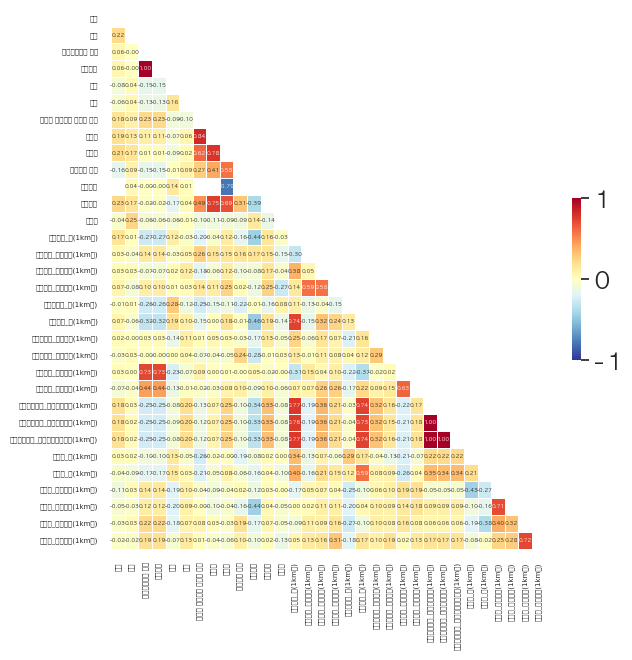

In [34]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)

sns.set(style='white', font_scale=1.6,
        font="AppleGothic", 
        #font='Malgun Gothic',
        rc={"axes.unicode_minus":False})

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cor_matrix, bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(cor_matrix, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .3},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws={"size": 4},
            fmt=".2f"
           ).figure.savefig('../IMG/testout.png')

In [15]:
sel_from_crm = ['별점','네이버 이런점이 좋아요 총합', '리뷰수', '객실수', '숙박가격', '경쟁업소_수(1km내)',
                '교통유동인구_월평균승하차총계(1km내)']
sel_continuous_var = continuous_var[sel_from_crm]
sel_continuous_var.info()
sel_continuous_var_rename = sel_continuous_var.rename(columns={'네이버 이런점이 좋아요 총합':'이런점이 좋아요 총합',
                                                               '교통유동인구_월평균승하차총계(1km내)': '월평균승하차총계'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   별점                     218 non-null    float64
 1   네이버 이런점이 좋아요 총합        150 non-null    float64
 2   리뷰수                    314 non-null    float64
 3   객실수                    731 non-null    float64
 4   숙박가격                   1042 non-null   int64  
 5   경쟁업소_수(1km내)           1042 non-null   int64  
 6   교통유동인구_월평균승하차총계(1km내)  1042 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 57.1 KB


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
findfont: Font family 'Malgun Gothic' not found.
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47088 (\N{HA

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/mankikim/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/Users/mankikim/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun G

<Figure size 2000x3000 with 0 Axes>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/mankikim/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mankikim/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Goth

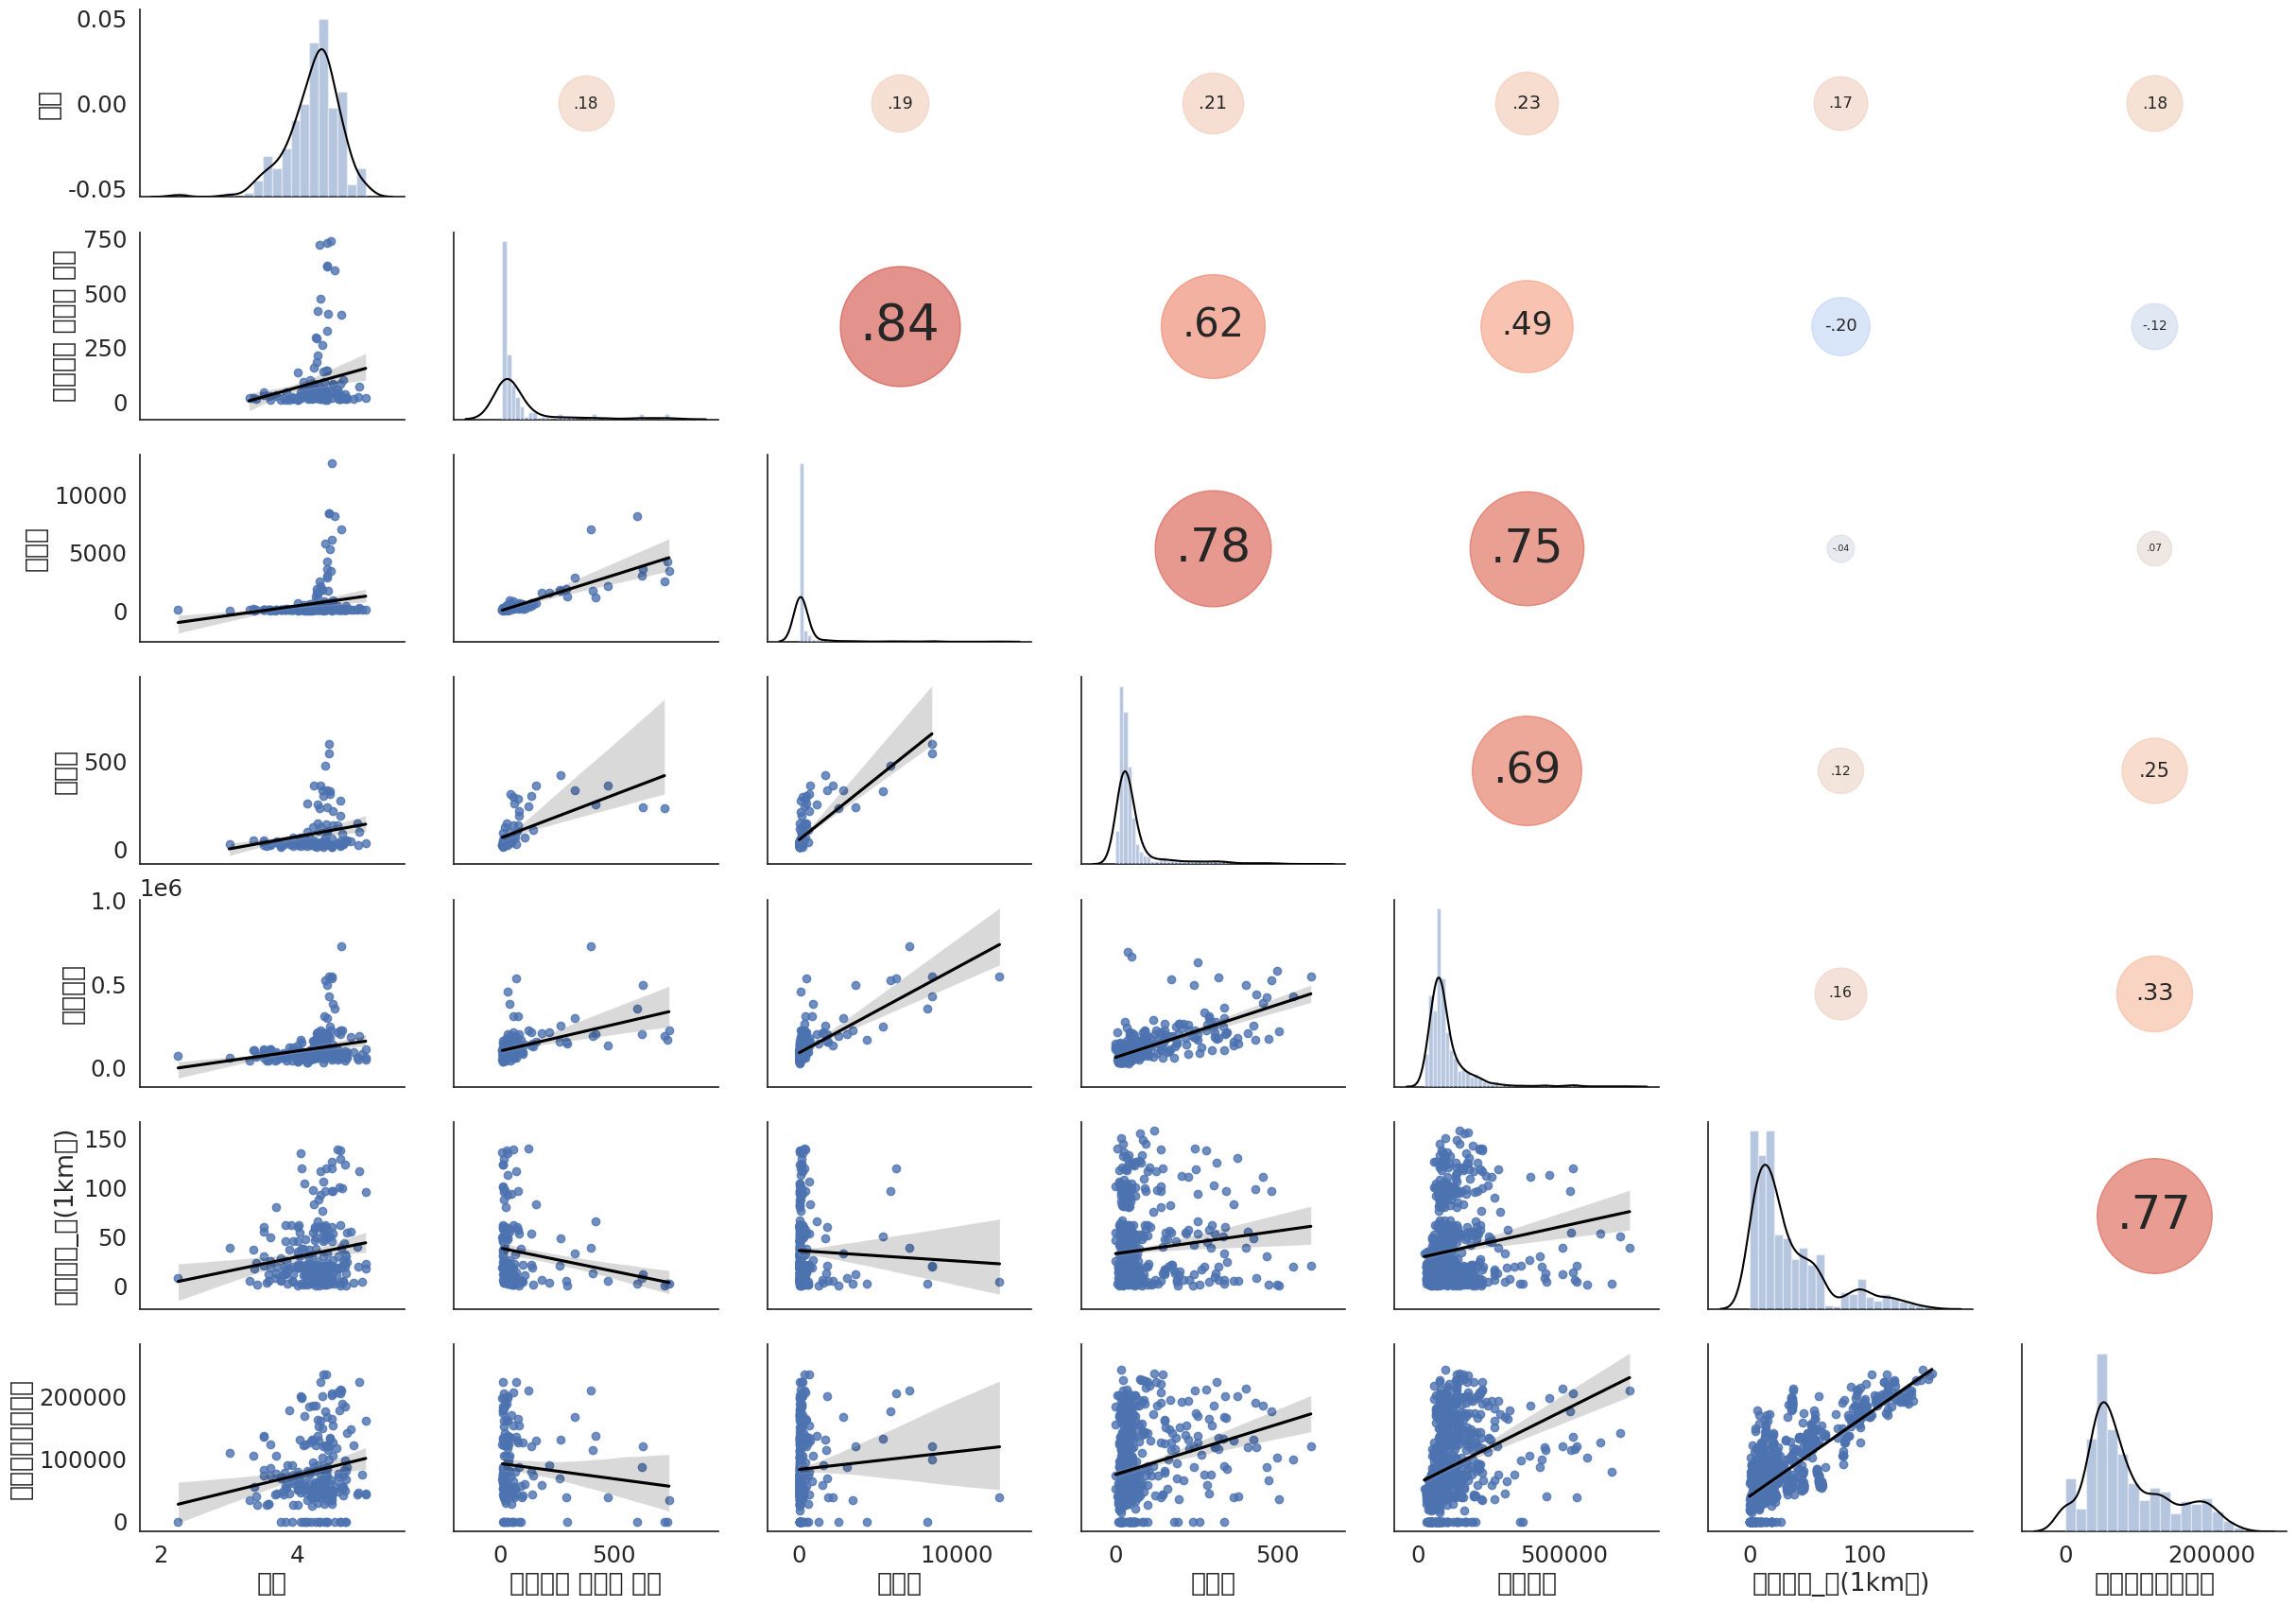

In [33]:
#fig, ax = plt( figsize=(7,14) )
plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.6,
        #font="AppleGothic", 
        font="Malgun Gothic", 
        rc={"axes.unicode_minus":False})
g = sns.PairGrid(sel_continuous_var_rename, aspect=1.4, diag_sharey=False)
#g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
#ax.axhline(y=100)
g.map_lower(sns.regplot, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

In [17]:
sel_continuous_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   별점                     218 non-null    float64
 1   네이버 이런점이 좋아요 총합        150 non-null    float64
 2   리뷰수                    314 non-null    float64
 3   객실수                    731 non-null    float64
 4   숙박가격                   1042 non-null   int64  
 5   경쟁업소_수(1km내)           1042 non-null   int64  
 6   교통유동인구_월평균승하차총계(1km내)  1042 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 57.1 KB


/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2657/1336899281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel1.dropna(inplace=True)
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2657/1336899281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2.dropna(inplace=True)
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2657/1336899281.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3.d

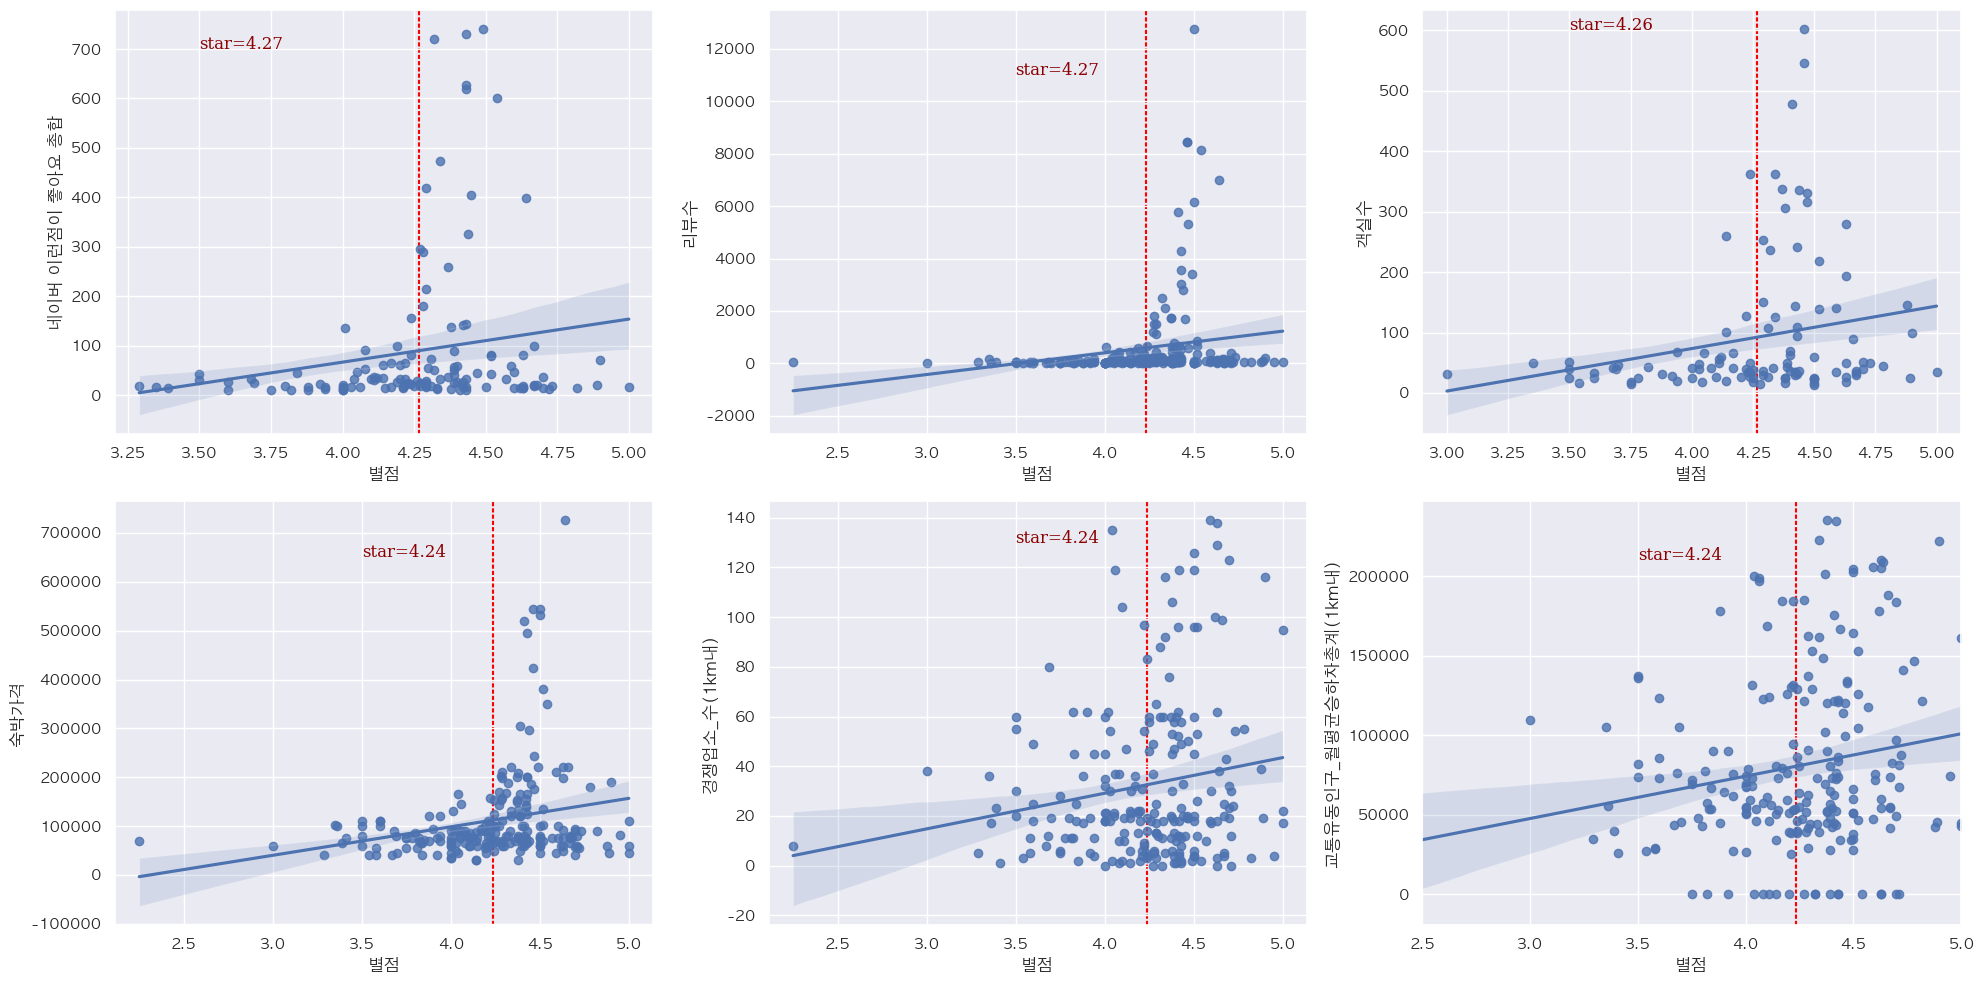

In [32]:
# 개별 scatter plot
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

sel1 = sel_continuous_var[['네이버 이런점이 좋아요 총합','별점']]
sel1.dropna(inplace=True)
sel2 = sel_continuous_var[['리뷰수','별점']]
sel2.dropna(inplace=True)
sel3 = sel_continuous_var[['객실수','별점']]
sel3.dropna(inplace=True)
sel4 = sel_continuous_var[['숙박가격','별점']]
sel4.dropna(inplace=True)
sel5 = sel_continuous_var[['경쟁업소_수(1km내)','별점']]
sel5.dropna(inplace=True)
sel6 = sel_continuous_var[['교통유동인구_월평균승하차총계(1km내)','별점']]
sel6.dropna(inplace=True)

font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 12}
font2 = {'family': 'serif',
      'color':  'darkblue',
      'weight': 'normal',
      'size': 12}


g1 = sns.regplot(x=sel1['별점'], y=sel1['네이버 이런점이 좋아요 총합'], ax=ax[0,0])
ax[0,0].axvline(x=sel1['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[0,0].text(3.5, 700, f'star={sel1["별점"].mean():.2f}', fontdict=font1)
#ax[0,0].text(2.5, 700, f"R={cor_matrix['별점']['네이버 이런점이 좋아요 총합']:.2f}", fontdict=font2)
plt.xlim(2.5,5)

g2 = sns.regplot(x=sel2['별점'], y=sel2['리뷰수'], ax=ax[0,1])
ax[0,1].axvline(x=sel2['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[0,1].text(3.5, 11000, f'star={sel1["별점"].mean():.2f}', fontdict=font1)
#ax[0,1].text(2.5, 11000, f"R={cor_matrix['별점']['리뷰수']:.2f}", fontdict=font2)
plt.xlim(2.5,5)

g3 = sns.regplot(x=sel3['별점'], y=sel3['객실수'], ax=ax[0,2])
ax[0,2].axvline(x=sel3['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[0,2].text(3.5, 600, f'star={sel3["별점"].mean():.2f}', fontdict=font1)
#ax[0,2].text(2.5, 600, f"R={cor_matrix['별점']['객실수']:.2f}", fontdict=font2)
plt.xlim(2.5,5)


g4 = sns.regplot(x=sel4['별점'], y=sel4['숙박가격'], ax=ax[1,0])
ax[1,0].axvline(x=sel4['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[1,0].text(3.5, 650000, f'star={sel4["별점"].mean():.2f}', fontdict=font1)
#ax[0,3].text(2.5, 650000, f"R={cor_matrix['별점']['숙박가격']:.2f}", fontdict=font2)
plt.xlim(2.5,5)

g5 = sns.regplot(x=sel5['별점'], y=sel5['경쟁업소_수(1km내)'], ax=ax[1,1])
ax[1,1].axvline(x=sel5['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[1,1].text(3.5, 130, f'star={sel5["별점"].mean():.2f}', fontdict=font1)
#ax[1,0].text(2.5, 130, f"R={cor_matrix['별점']['경쟁업소_수(1km내)']:.2f}", fontdict=font2)
plt.xlim(2.5,5)

g6 = sns.regplot(x=sel6['별점'], y=sel6['교통유동인구_월평균승하차총계(1km내)'], ax=ax[1,2])
ax[1,2].axvline(x=sel6['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[1,2].text(3.5, 210000, f'star={sel6["별점"].mean():.2f}', fontdict=font1)
#ax[1,3].text(2.5, 210000, f"R={cor_matrix['별점']['교통유동인구_월평균승하차총계(1km내)']:.2f}", fontdict=font2)
plt.xlim(2.5,5)



fig.tight_layout()


In [25]:
# 각 항목별 평균 별점 기준 평균 차이 구하기

['네이버 이런점이 좋아요 총합','리뷰수','객실수','숙박가격','경쟁업소_수(1km내)','교통유동인구_월평균승하차총계(1km내)']

sel1_cond_up_index = sel1['별점'] >= sel1['별점'].mean()
sel2_cond_up_index = sel2['별점'] >= sel2['별점'].mean()
sel3_cond_up_index = sel3['별점'] >= sel3['별점'].mean()
sel4_cond_up_index = sel4['별점'] >= sel4['별점'].mean()
sel5_cond_up_index = sel5['별점'] >= sel5['별점'].mean()
sel6_cond_up_index = sel6['별점'] >= sel6['별점'].mean()


sel1_cond_down_index = sel1['별점'] < sel1['별점'].mean()
sel2_cond_down_index = sel2['별점'] < sel2['별점'].mean()
sel3_cond_down_index = sel3['별점'] < sel3['별점'].mean()
sel4_cond_down_index = sel4['별점'] < sel4['별점'].mean()
sel5_cond_down_index = sel5['별점'] < sel5['별점'].mean()
sel6_cond_down_index = sel6['별점'] < sel6['별점'].mean()



sel1_cond_up = sel1['네이버 이런점이 좋아요 총합'][sel1_cond_up_index]
sel2_cond_up = sel2['리뷰수'][sel2_cond_up_index]
sel3_cond_up = sel3['객실수'][sel3_cond_up_index]
sel4_cond_up = sel4['숙박가격'][sel4_cond_up_index]
sel5_cond_up = sel5['경쟁업소_수(1km내)'][sel5_cond_up_index]
sel6_cond_up = sel6['교통유동인구_월평균승하차총계(1km내)'][sel6_cond_up_index]

sel1_cond_down = sel1['네이버 이런점이 좋아요 총합'][sel1_cond_down_index]
sel2_cond_down = sel2['리뷰수'][sel2_cond_down_index]
sel3_cond_down = sel3['객실수'][sel3_cond_down_index]
sel4_cond_down = sel4['숙박가격'][sel4_cond_down_index]
sel5_cond_down = sel5['경쟁업소_수(1km내)'][sel5_cond_down_index]
sel6_cond_down = sel6['교통유동인구_월평균승하차총계(1km내)'][sel6_cond_down_index]

data_mean = [[sel1_cond_up.mean(), sel1_cond_down.mean()],
             [sel2_cond_up.mean(), sel2_cond_down.mean()],
             [sel3_cond_up.mean(), sel3_cond_down.mean()],
             [sel4_cond_up.mean(), sel4_cond_down.mean()],
             [sel5_cond_up.mean(), sel5_cond_down.mean()],
             [sel6_cond_up.mean(), sel6_cond_down.mean()]]

# 평균 별점 기준 각 속성 평균 비교
df_diff_mean = pd.DataFrame(data=data_mean, index=['네이버 이런점이 좋아요 총합','리뷰수','객실수','숙박가격','경쟁업소_수(1km내)','교통유동인구_월평균승하차총계(1km내)'], columns=['up_mean','down_mean'])
df_diff_mean['diff'] = df_diff_mean['up_mean'] - df_diff_mean['down_mean']

In [26]:
# 차이가 무의미 할수도 있음, 4.2기준으로 폭발적으로 증가했기 때문에
# 유의미한 차이인지 검증
import scipy.stats as stats
t_stat1, p_val1 = stats.ttest_ind(sel1['네이버 이런점이 좋아요 총합'][sel1_cond_up_index], sel1['네이버 이런점이 좋아요 총합'][sel1_cond_down_index])
t_stat2, p_val2 = stats.ttest_ind(sel2['리뷰수'][sel2_cond_up_index], sel2['리뷰수'][sel2_cond_down_index])
t_stat3, p_val3 = stats.ttest_ind(sel3['객실수'][sel3_cond_up_index], sel3['객실수'][sel3_cond_down_index])
t_stat4, p_val4 = stats.ttest_ind(sel4['숙박가격'][sel4_cond_up_index], sel4['숙박가격'][sel4_cond_down_index])
t_stat5, p_val5 = stats.ttest_ind(sel5['경쟁업소_수(1km내)'][sel5_cond_up_index], sel5['경쟁업소_수(1km내)'][sel5_cond_down_index])
t_stat6, p_val6 = stats.ttest_ind(sel6['교통유동인구_월평균승하차총계(1km내)'][sel6_cond_up_index], sel6['교통유동인구_월평균승하차총계(1km내)'][sel6_cond_down_index])

print(f'{t_stat1}, {p_val1:.7f}')
print(f'{t_stat2}, {p_val2:.7f}')
print(f'{t_stat3}, {p_val3:.7f}')
print(f'{t_stat4}, {p_val4:.7f}')
print(f'{t_stat5}, {p_val5:.7f}')
print(f'{t_stat6}, {p_val6:.7f}')
#print(f'{t_stat7}, {p_val7:.7f}')
#print(f'{t_stat8}, {p_val8:.7f}')

#df_diff_mean['t-stat'] = [t_stat1, t_stat2, t_stat3, p_val4, p_val5, p_val6, p_val7, p_val8]
df_diff_mean['p-value(t-test)'] = [p_val1, p_val2, p_val3, p_val4, p_val5, p_val6]
df_diff_mean


3.5571224581527985, 0.0005305
3.8337342082116854, 0.0001690
3.196985592213147, 0.0018263
4.966971459597675, 0.0000014
2.28533190759771, 0.0232639
2.2739631466581343, 0.0239508


,up_mean,down_mean,diff,p-value(t-test)
네이버 이런점이 좋아요 총합,130.767123,34.611111,96.156012,0.000531
리뷰수,963.793103,93.558140,870.234964,0.000169
객실수,121.555556,51.934783,69.620773,0.001826
숙박가격,138806.333333,75921.717391,62884.615942,0.000001
경쟁업소_수(1km내),36.809524,26.663043,10.146480,0.023264
교통유동인구_월평균승하차총계(1km내),87878.806984,70539.117826,17339.689158,0.023951


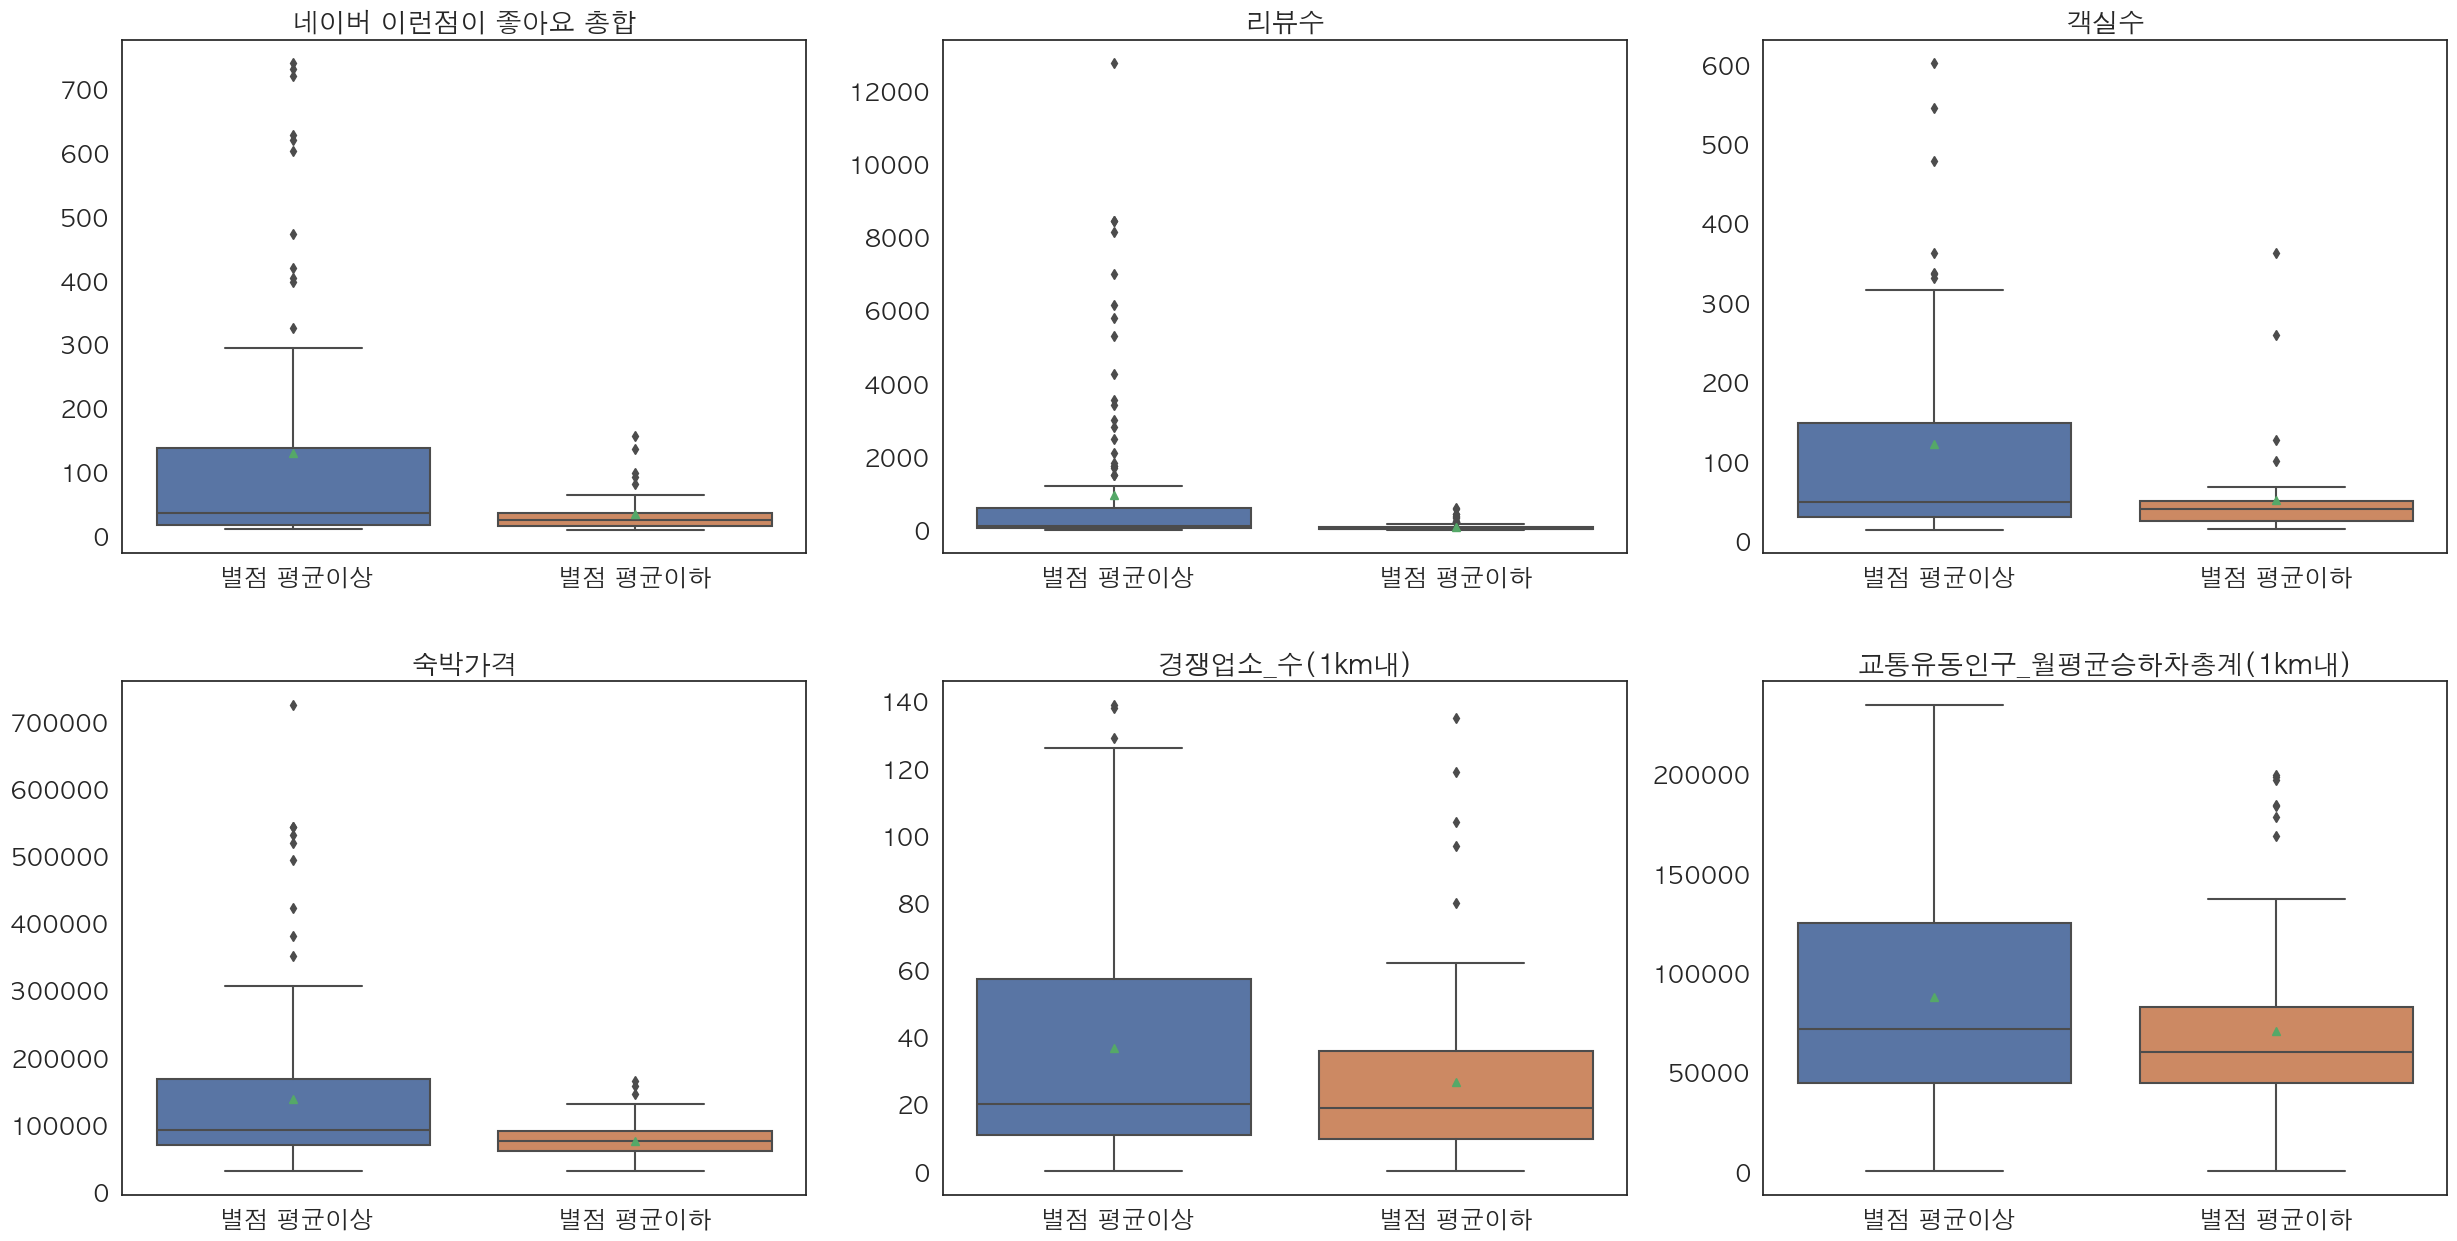

In [35]:
# # 평균별점 기준 box plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

list_up = [[sel1_cond_up, sel2_cond_up, sel3_cond_up],
           [sel4_cond_up, sel5_cond_up, sel6_cond_up]]
list_down = [[sel1_cond_down, sel2_cond_down, sel3_cond_down],
             [sel4_cond_down, sel5_cond_down, sel6_cond_down]]
list_name = [['네이버 이런점이 좋아요 총합', '리뷰수', '객실수'],
             ['숙박가격','경쟁업소_수(1km내)', '교통유동인구_월평균승하차총계(1km내)' ]]

# rectangular box plot
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        #print(i,j)

        a = list_up[i][j].reset_index(drop=False).rename(columns={list_name[i][j]:' 별점 평균이상'})
        b = list_down[i][j].reset_index(drop=False).rename(columns={list_name[i][j]:'별점 평균이하'})

        plot_data = pd.concat( [a,b], axis=1)
        plot_data.drop('index', axis=1, inplace=True)
        #print(plot_data)

        sns.boxplot(plot_data, ax=ax[i,j], showmeans=True )
        ax[i,j].set_title(list_name[i][j])

fig.subplots_adjust(hspace=0.25)


In [38]:
import statsmodels.api as sm
 
#define response variable
a = sel_continuous_var.dropna()
x = a[['네이버 이런점이 좋아요 총합','리뷰수','객실수','숙박가격','경쟁업소_수(1km내)','교통유동인구_월평균승하차총계(1km내)']]

print(x.info())

#define predictor variables
y = a['별점'].values
#print(y.info())
 
#add constant to predictor variables
x = sm.add_constant(x)
 
#fit linear regression model
model = sm.OLS(y, x).fit()
 
#view model summary
model.summary()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 116 to 1001
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   네이버 이런점이 좋아요 총합        59 non-null     float64
 1   리뷰수                    59 non-null     float64
 2   객실수                    59 non-null     float64
 3   숙박가격                   59 non-null     int64  
 4   경쟁업소_수(1km내)           59 non-null     int64  
 5   교통유동인구_월평균승하차총계(1km내)  59 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 3.2 KB
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.168
Date:                Tue, 23 May 2023   Prob (F-statistic):              0.338
Time:                        23:09:55   Log-Likelihood:                -15.209
No. Observations:                  59   AIC:                             44.42
Df Residuals:                      52   BIC:                             58.96
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.1856      0.106     39.640      0.000       3.974       4.397
네이버 이런점이 좋아요 총합          -0.0005      0.001     -0.605      0.548      -0.002       0.001
리뷰수                       0.0001      0.000      0.512      0.611      -0.000       0.001
객실수                       0.0003      0.001      0.425      0.673      -0.001       0.002
숙박가격                   7.769e-07   1.18e-06      0.657      0.514   -1.59e-06    3.15e-06
경쟁업소_수(1km내)              0.0044      0.002      2.219      0.031       0.000       0.008
교통유동인구_월평균승하차총계(1km내)  -1.95e-06   1.29e-06     -1.508      0.138   -4.55e-06    6.45e-07
==============================================================================
Omnibus:                        2.938   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.037
Skew:                          -0.388   Prob(JB):                        0.361
Kurtosis:                       3.475   Cond. No.                     3.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""